# Problem Set 2

 - Due Date: March 26, 2025 
 - Time: 11:59pm
 - We will deduct 3 points (out of 10) for submissions that are late but less than 1 hour late.
 - Submissions that are more than 1 hour late give 0 points. 

__Upload your solutions to Canvas__ (if you experience any problems with Canvas, e-mail your solution to shsu@utexas.edu or priyansh@utexas.edu)

We will deduct points if the following requirements are not fulfilled:

 - hand in your solutions as a single Jupyter Notebook
 - answers (except for code) should be written in Markdown
 - use comments in the code sections to explain what you do
 - you can work in groups of three, but everyone has to hand in their own write-up of the solution
 - if you face a problem that you are not able to solve or you think your answer is wrong, explain why you think it is wrong and what you would expect.
 - make sure that figures are properly labelled: label the axes and add a legend.


Do not forget to add your name to the problem set solution.

## Problem 1

#### (a) 

Use Python to download and import data from the FRED database on:

- Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
- Personal Consumption Expenditures Excluding Food and Energy (Chain-Type Price Index) (PCEPILFE)
- University of Michigan: Inflation Expectation (MICH)
- 10-Year Expected Inflation (EXPINF10YR)

for the period January 2000 until December 2023. Download the data at monthly frequency.

Transform the CPI (CPIAUCSL) and the PCE (PCEPILFE) to year-on-year inflation rates.



Plot the four series (year-on-year CPI inflation, year-on-year PCE inflation, MICH, EXPINF10YR) together in one figure. Make sure to clearly label the different series.

#### (b)

Focus on the period after the Great Financial Crisis, that is, focus on the period from 2010 until 2019. 

Has the Federal Reserve been successfull during that period in keeping inflation at its target of 2%?

Has there been a trend in inflation expectations during that time (look at 1-year-ahead expectations from the University of Michigan Survey and at the 10-year-ahead expectations)?

Describe what you observe during that period. Use figures, summary statistics (i.e., compare averages of the different series, their correlations, and so on), etc., for your analysis.


#### (c)

Now do the same as in __(b)__ but for the period from 2019 until the end of the sample.

Describe what you observe and how this period compares to the period analyzed in __(b)__.

#### (d)

Now use data from [Google searches](https://trends.google.com/trends/) (link: https://trends.google.com/trends/) for the two time periods analyzed. Describe the observed patterns in people's internet-search behavior of "inflation" (make sure to download and import the data at monthly frequency and plot the downloaded time series for the period 2004 until 2023). 

How might inflation, inflation expectations, and Google searches of inflation be related? 

How could inflation affect people's internet-search behavior of inflation?

How could people's internet-search behavior of inflation affect inflation itself?

#### (e)

Import the two following time series from the FRED database at quarterly frequency.

- Government total expenditures (W068RCQ027SBEA)
- Nominal Gross Domestic Product for United States (NGDPSAXDCUSQ)

and construct a new series that expressed Government total expenditures as a share of nominal GDP.

#### (f)

Focusing on the period after 2019, do you think government total expenditures played a role for the observed inflation dynamics during that period? If so, how may government total expenditures have affected inflation and inflation expectations?

#### (g)

Download and import from the FRED database the variable

- Federal Funds Effective Rate (DFF)

Make sure to import it at monthly frequency (use the Aggregation method "Average").

#### (h)

The Federal Funds Effective Rate (FFR for short) is the main instrument for monetary policy (i.e., for the Federal Reserve) and is mainly adjusted to bring or keep inflation close to its target of 2%. 

Focus on the evolution of the FFR and of inflation (and inflation expectations) from 2010 to 2023, in particular on the following three episodes:

- 2010 until 2015
- March/April 2020 until March 2022
- After March 2022

What do you think were the main reasons for the Federal Reserve to adjust the FFR in that way? (Use only the variables discussed in this problem set for your arguments, and ignore other variables (such as unemployment).)

In [1]:
from fredapi import Fred
import matplotlib.pyplot as plt


#### (a)


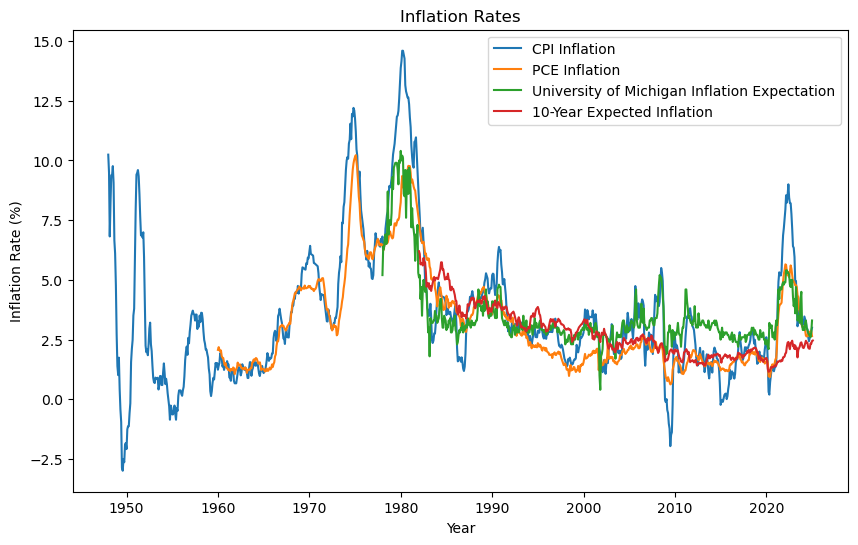

In [2]:
# Initialize the API client
fred = Fred(api_key='7143bc5931abee5f8338adfcd10042fe')

# Download the data
cpi = fred.get_series('CPIAUCSL', start='2000-01-01', end='2023-12-31', frequency='m')
pce = fred.get_series('PCEPILFE', start='2000-01-01', end='2023-12-31', frequency='m')
mich = fred.get_series('MICH', start='2000-01-01', end='2023-12-31', frequency='m')
expinf10yr = fred.get_series('EXPINF10YR', start='2000-01-01', end='2023-12-31', frequency='m')

# Transform CPI and PCE to year-on-year inflation rates
cpi_yoy = cpi.pct_change(periods=12) * 100
pce_yoy = pce.pct_change(periods=12) * 100

# Plot the four series

plt.figure(figsize=(10, 6))
plt.plot(cpi_yoy, label='CPI Inflation')
plt.plot(pce_yoy, label='PCE Inflation')
plt.plot(mich, label='University of Michigan Inflation Expectation')
plt.plot(expinf10yr, label='10-Year Expected Inflation')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Inflation Rates')
plt.legend()
plt.show()


#### (b)

In the period following the Great Financial Crisis, the Federal Reserve managed to keep the PCE inflation rates slightly below the 2% target. While the CPI occasionally exceeded this mark, it is fair to say that, on average, the 2% inflation target was effectively maintained. Indeed, the average CPI inflation rate was 1.77%, and the average PCE inflation rate was 1.59% during this timeframe.

Inflation expectations for one year ahead, as measured by the Michigan Survey, showed a slight downward trend over the same period, whereas the expectations for ten years ahead did not exhibit a visible trend. The correlation between one-year-ahead inflation expectations and CPI inflation during this period is approximately 0.4. This suggests a potential for CPI inflation rates to influence short-term inflation expectations downward.



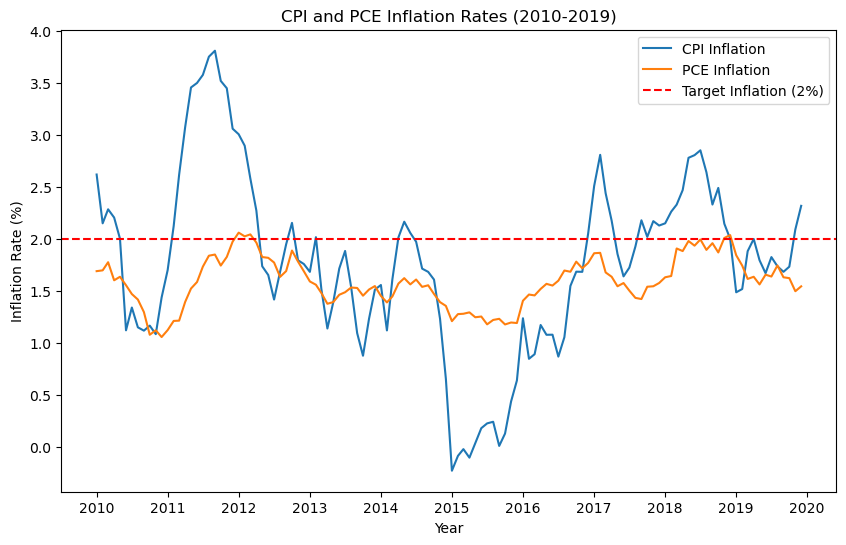

(1.7712719768810719, 1.585196444908351)

In [ ]:
# Has the Federal Reserve been successful during that period in keeping inflation at its target of 2%?
# Plot the CPI inflation and the PCE inflation rates, and add a horizontal line at 2% focusing on the subsample from 2010 until 2019
# Filter the data for the subsample from 2010 until 2019

# Plot the CPI inflation and PCE inflation rates
plt.figure(figsize=(10, 6))
plt.plot(cpi_yoy['2010':'2019'], label='CPI Inflation')
plt.plot(pce_yoy['2010':'2019'], label='PCE Inflation')
# Add a horizontal line at 2%
plt.axhline(y=2, color='red', linestyle='--', label='Target Inflation (2%)')

plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('CPI and PCE Inflation Rates (2010-2019)')
plt.legend()
plt.show()

# Compute the average inflation rates for the CPI and PCE inflation rates for the subsample from 2010 until 2019
cpi_avg = cpi_yoy['2010':'2019'].mean()
pce_avg = pce_yoy['2010':'2019'].mean()
cpi_avg, pce_avg


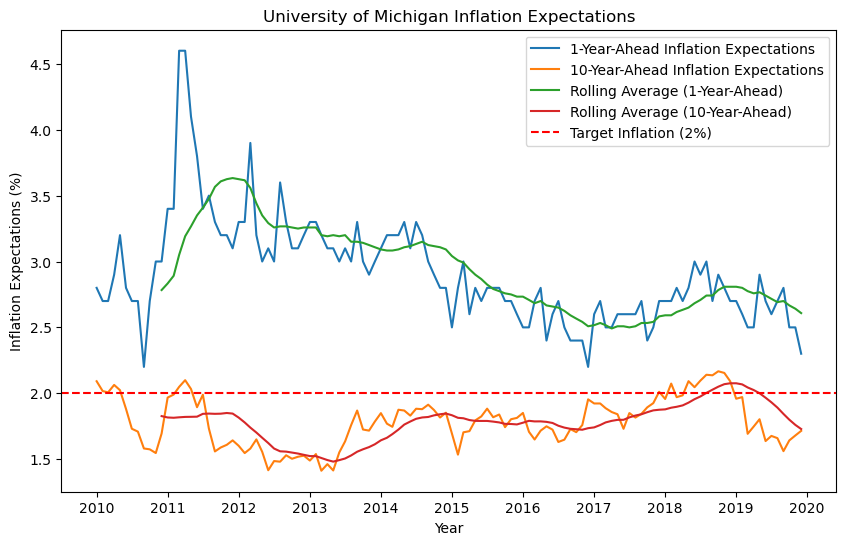

Correlation between CPI and Michigan survey 1-year-ahead inflation expectations: 0.3998411108333853
Correlation between PCE and Michigan survey 1-year-ahead inflation expectations: 0.02339187495354304
Correlation between CPI and 10-year-ahead inflation expectations: 0.26077892522252566
Correlation between PCE and 10-year-ahead inflation expectations: 0.13316945030364788
Correlation between Michigan survey 1-year-ahead inflation expectations and 10-year-ahead inflation expectations: -0.012646304816690853


In [4]:
# Has there been a trend in inflation expectations during that time (look at 1-year-ahead expectations from the University of Michigan Survey and at the 10-year-ahead expectations)?
# Plot the University of Michigan 1-year-ahead inflation expectations and the 10-year-ahead inflation expectations as well as rolling averages of these series focusing on the subsample from 2010 until 2019
# Plot the University of Michigan 1-year-ahead inflation expectations and the 10-year-ahead inflation expectations
plt.figure(figsize=(10, 6))
plt.plot(mich['2010':'2019'], label='1-Year-Ahead Inflation Expectations')
plt.plot(expinf10yr['2010':'2019'], label='10-Year-Ahead Inflation Expectations')

# Compute rolling averages of the series
rolling_avg_mich = mich['2010':'2019'].rolling(window=12).mean()
rolling_avg_expinf10yr = expinf10yr['2010':'2019'].rolling(window=12).mean()

# Plot the rolling averages
plt.plot(rolling_avg_mich, label='Rolling Average (1-Year-Ahead)')
plt.plot(rolling_avg_expinf10yr, label='Rolling Average (10-Year-Ahead)')
plt.axhline(y=2, color='red', linestyle='--', label='Target Inflation (2%)')

plt.xlabel('Year')
plt.ylabel('Inflation Expectations (%)')
plt.title('University of Michigan Inflation Expectations')
plt.legend()
plt.show()

# Compute the simple correlations
# Michigan survey 1-year-ahead inflation expectations
print("Correlation between CPI and Michigan survey 1-year-ahead inflation expectations:",cpi_yoy['2010':'2019'].corr(mich['2010':'2019']))
print("Correlation between PCE and Michigan survey 1-year-ahead inflation expectations:",pce_yoy['2010':'2019'].corr(mich['2010':'2019']))
# Long-run inflation expectations
print("Correlation between CPI and 10-year-ahead inflation expectations:", cpi_yoy['2010':'2019'].corr(expinf10yr['2010':'2019']))
print("Correlation between PCE and 10-year-ahead inflation expectations:", pce_yoy['2010':'2019'].corr(expinf10yr['2010':'2019']))

# Michigan survey 1-year-ahead inflation expectations and long-run inflation expectations
print ("Correlation between Michigan survey 1-year-ahead inflation expectations and 10-year-ahead inflation expectations:", mich['2010':'2019'].corr(expinf10yr['2010':'2019']))



#### (c)
Starting in mid-2020, inflation rates began to rise, reaching a peak in mid-2022. At the same time, near-term inflation expectations surged, hitting a peak of 5%. The increasing rolling variances indicate that inflation became significantly more volatile as the inflation rates rose. The average inflation rates are way above the 2% inflatin target.

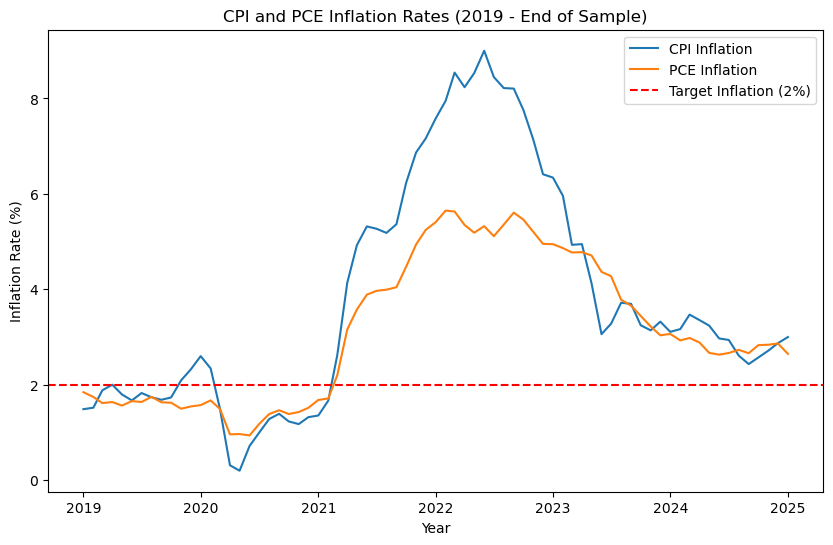

(3.7960878218250795, 3.137616603920447)

In [5]:
# Plot the CPI inflation and PCE inflation rates
plt.figure(figsize=(10, 6))
plt.plot(cpi_yoy['2019':], label='CPI Inflation')
plt.plot(pce_yoy['2019':], label='PCE Inflation')
# Add a horizontal line at 2%
plt.axhline(y=2, color='red', linestyle='--', label='Target Inflation (2%)')

plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('CPI and PCE Inflation Rates (2019 - End of Sample)')
plt.legend()
plt.show()

# Compute the average inflation rates for the CPI and PCE inflation rates for the subsample from 2019 until the end of the sample
cpi_avg = cpi_yoy['2019':].mean()
pce_avg = pce_yoy['2019':].mean()
cpi_avg, pce_avg

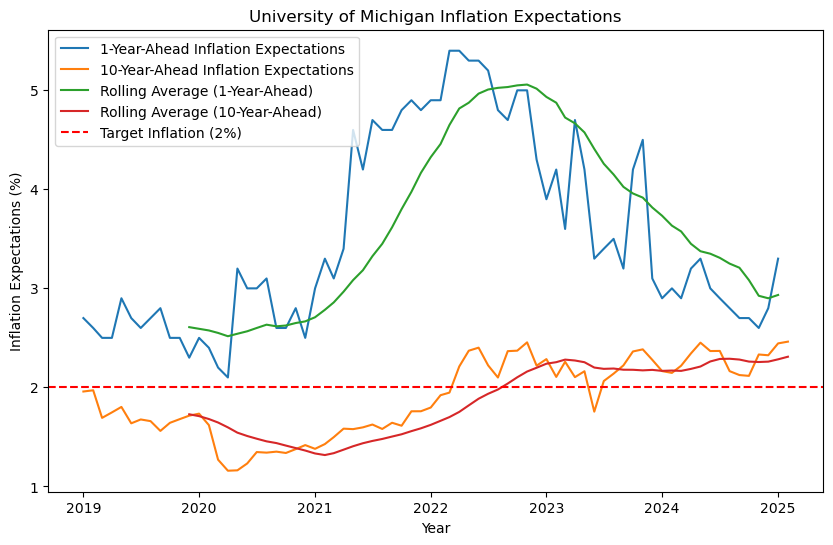

Correlation between CPI and Michigan survey 1-year-ahead inflation expectations: 0.9111487980512639
Correlation between PCE and Michigan survey 1-year-ahead inflation expectations: 0.8866477214174616
Correlation between CPI and 10-year-ahead inflation expectations: 0.49891410912265993
Correlation between PCE and 10-year-ahead inflation expectations: 0.5768199761393481
Correlation between Michigan survey 1-year-ahead inflation expectations and 10-year-ahead inflation expectations: 0.35858989495131466


In [6]:
plt.figure(figsize=(10, 6))
plt.plot(mich['2019':], label='1-Year-Ahead Inflation Expectations')
plt.plot(expinf10yr['2019':], label='10-Year-Ahead Inflation Expectations')

# Compute rolling averages of the series
rolling_avg_mich = mich['2019':].rolling(window=12).mean()
rolling_avg_expinf10yr = expinf10yr['2019':].rolling(window=12).mean()

# Plot the rolling averages
plt.plot(rolling_avg_mich, label='Rolling Average (1-Year-Ahead)')
plt.plot(rolling_avg_expinf10yr, label='Rolling Average (10-Year-Ahead)')
plt.axhline(y=2, color='red', linestyle='--', label='Target Inflation (2%)')

plt.xlabel('Year')
plt.ylabel('Inflation Expectations (%)')
plt.title('University of Michigan Inflation Expectations')
plt.legend()
plt.show()

# Compute the simple correlations
# Michigan survey 1-year-ahead inflation expectations
print("Correlation between CPI and Michigan survey 1-year-ahead inflation expectations:",cpi_yoy['2019':].corr(mich['2019':]))
print("Correlation between PCE and Michigan survey 1-year-ahead inflation expectations:",pce_yoy['2019':].corr(mich['2019':]))
# Long-run inflation expectations
print("Correlation between CPI and 10-year-ahead inflation expectations:", cpi_yoy['2019':].corr(expinf10yr['2019':]))
print("Correlation between PCE and 10-year-ahead inflation expectations:", pce_yoy['2019':].corr(expinf10yr['2019':]))

# Michigan survey 1-year-ahead inflation expectations and long-run inflation expectations
print ("Correlation between Michigan survey 1-year-ahead inflation expectations and 10-year-ahead inflation expectations:", mich['2019':].corr(expinf10yr['2019':]))


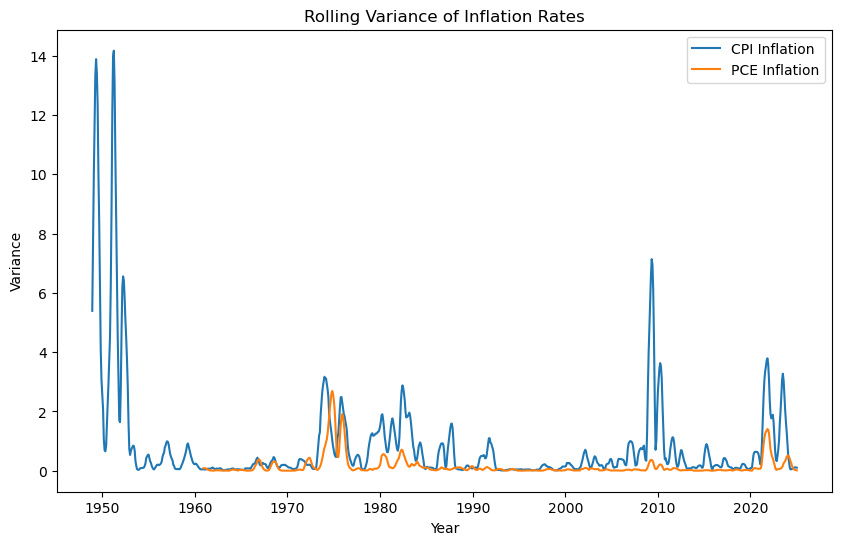

In [7]:
# Compute the rolling variances of PCE and CPI inflation rates
rolling_var_cpi = cpi_yoy.rolling(window=12).var()
rolling_var_pce = pce_yoy.rolling(window=12).var()

# Plot the rolling variances
plt.figure(figsize=(10, 6))
plt.plot(rolling_var_cpi, label='CPI Inflation')
plt.plot(rolling_var_pce, label='PCE Inflation')
plt.xlabel('Year')
plt.ylabel('Variance')
plt.title('Rolling Variance of Inflation Rates')
plt.legend()
plt.show()


#### (d)
Google searches are higher when inflation (and expectations) are higher. Higher inflation could raise people's attention (so that they google inflation more often) because news media report more about inflation. Higher attention to inflation could lead to a stronger incorporation of inflation into people's expectations which could reinforce actual inflation.

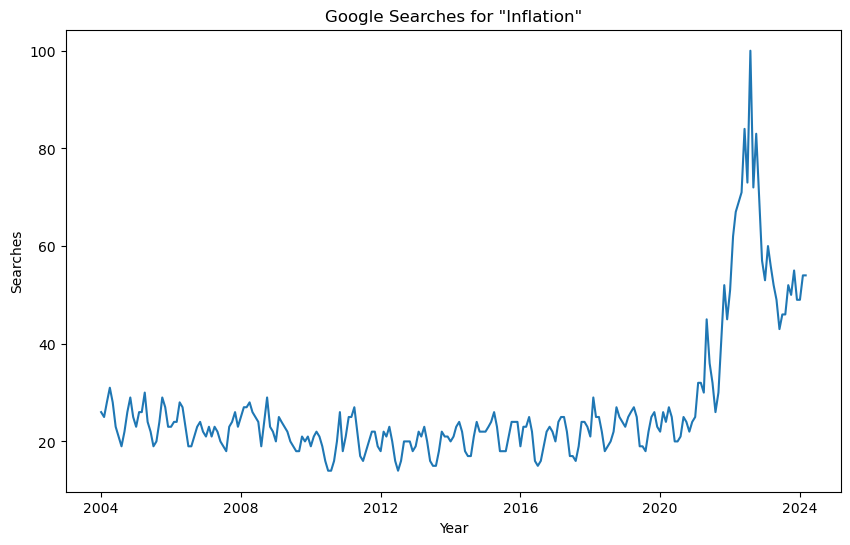

In [9]:
# Import 'multiTimeline.csv' and plot the data
import pandas as pd

# Load the data
gtrend_dat = pd.read_csv('multiTimeline.csv', skiprows=1)
gtrend_dat.columns = ['Month', 'Searches']
gtrend_dat['Month'] = pd.to_datetime(gtrend_dat['Month'])
gtrend_dat.set_index('Month', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(gtrend_dat)
plt.xlabel('Year')
plt.ylabel('Searches')
plt.title('Google Searches for "Inflation"')
plt.show()



#### (e)

In [16]:
# Download the data
GOVEXP = fred.get_series('W068RCQ027SBEA', frequency='q')
NGDP = fred.get_series('NGDPSAXDCUSQ', frequency='q')

# Construct the new series
gov_expenditures_share = GOVEXP / NGDP*1000 # need to correct for the fact that GOVEXP is in billions, NGDP in millions


#### (f)
Higher government pending is likely to increase the aggregate demand, which might lead to an increase in inflation after the pandemic.

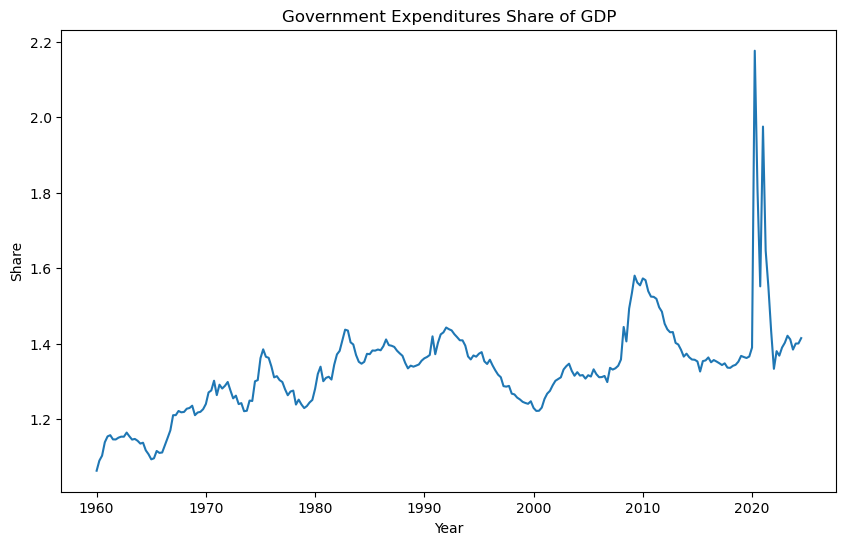

In [15]:
# Plot the expenditures share
plt.figure(figsize=(10, 6))
plt.plot(gov_expenditures_share)
plt.xlabel('Year')
plt.ylabel('Share')
plt.title('Government Expenditures Share of GDP')
plt.show()


#### (g)

In [12]:
# Download the data
FFR = fred.get_series('DFF', frequency='m', aggregation_method='avg')

#### (h)
Interest rates at zero, inflation was below target. So, by going to zero, the Fed tried to stimulate demand and hence, increase inflation (this assumes implicitly that the interest rate cannot go negative).
 - Interest rates were kept low, even though inflation started to increase. Fed might have reacted "too late" which may have contributed to the large inflation increase.
 - Interest rates strongly increased, inflation came down. If these were the only two variables, this suggests that the Fed's strong rate hikes dampened demand and brought inflation down. 

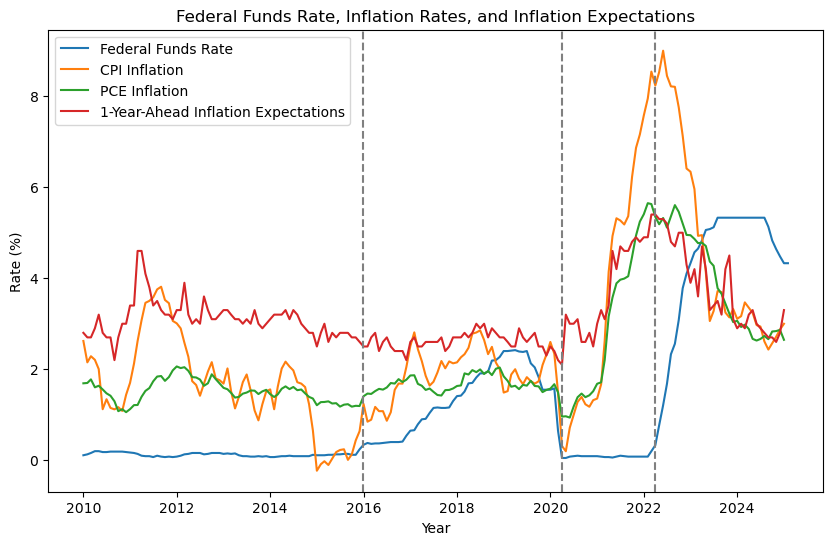

In [13]:
# Plot FFR, inflation rates, and the Michigan survey 1-year-ahead inflation expectations from 2010 until the end of the sample
# Add vertical dotted lines at the end of 2015, at March 2020, and at March 2022
plt.figure(figsize=(10, 6))
plt.plot(FFR['2010':], label='Federal Funds Rate')
plt.plot(cpi_yoy['2010':], label='CPI Inflation')
plt.plot(pce_yoy['2010':], label='PCE Inflation')
plt.plot(mich['2010':], label='1-Year-Ahead Inflation Expectations')

# Convert date strings to datetime objects
plt.axvline(x=pd.to_datetime('2015-12-31'), color='gray', linestyle='--')
plt.axvline(x=pd.to_datetime('2020-03-31'), color='gray', linestyle='--')
plt.axvline(x=pd.to_datetime('2022-03-31'), color='gray', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.title('Federal Funds Rate, Inflation Rates, and Inflation Expectations')
plt.legend()
plt.show()

